### **Exploring London's Travel Network**

![tower bridge](london.jpg)

London, or as the Romans called it "Londonium"! Home to [over 8.5 million residents](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/populationandhouseholdestimatesenglandandwales/census2021unroundeddata#population-and-household-estimates-england-and-wales-data) who speak over [300 languages](https://web.archive.org/web/20080924084621/http://www.cilt.org.uk/faqs/langspoken.htm). While the City of London is a little over one square mile (hence its nickname "The Square Mile"), Greater London has grown to encompass 32 boroughs spanning a total area of 606 square miles! 

![underground train leaving a platform](tube.jpg)

Given the city's roads were originally designed for horse and cart, this area and population growth has required the development of an efficient public transport system! Since the year 2000, this has been through the local government body called **Transport for London**, or *TfL*, which is managed by the London Mayor's office. Their remit covers the London Underground, Overground, Docklands Light Railway (DLR), buses, trams, river services (clipper and [Emirates Airline cable car](https://en.wikipedia.org/wiki/London_cable_car)), roads, and even taxis.

The Mayor of London's office make their data available to the public [here](https://data.london.gov.uk/dataset). In this project, you will work with a slightly modified version of a dataset containing information about public transport journey volume by transport type. 

The data has been loaded into an **AWS Redshift** database called `tfl` with a single table called `journeys`, including the following data:

## tfl.journeys

| Column | Definition | Data type |
|--------|------------|-----------|
| `month`| Month in number format, e.g., `1` equals January | `INTEGER` |
| `year` | Year | `INTEGER` |
| `days` | Number of days in the given month | `INTEGER` |
| `report_date` | Date that the data was reported | `DATE` |
| `journey_type` | Method of transport used | `VARCHAR` |
| `journeys_millions` | Millions of journeys, measured in decimals | `FLOAT` |

You will execute SQL queries to answer three questions, as listed in the instructions.

AAA

In [9]:
select journey_type, sum(journeys_millions) as total_journeys_millions 
from tfl.journeys 
group by tfl.journeys.journey_type 
order by total_journeys_millions desc

,journey_type,total_journeys_millions
0,Bus,24905.193947
1,Underground & DLR,15020.466544
2,Overground,1666.845666
3,TfL Rail,411.313421
4,Tram,314.689875
5,Emirates Airline,14.583718


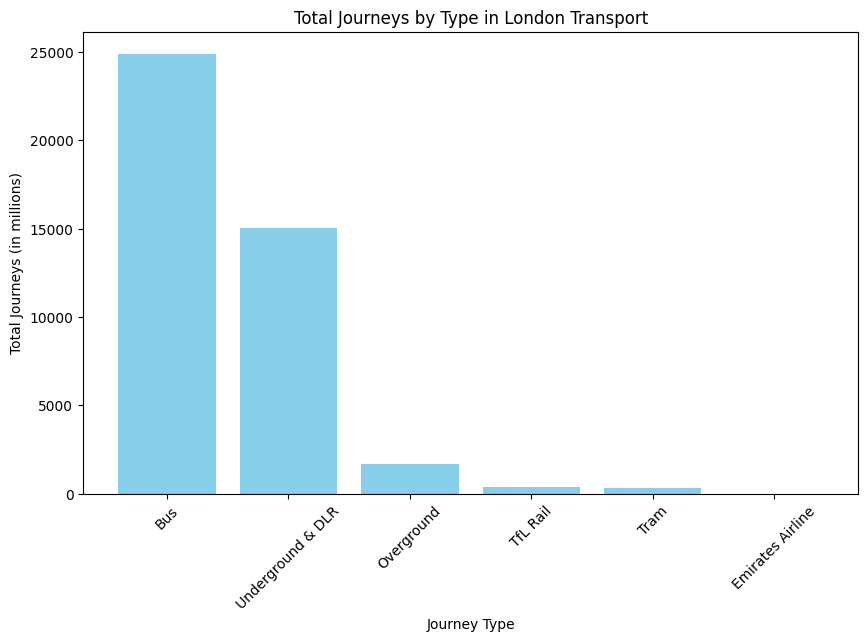

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(most_popular_transport_types['journey_type'], most_popular_transport_types['total_journeys_millions'], color='skyblue')
plt.xlabel('Journey Type')
plt.ylabel('Total Journeys (in millions)')
plt.title('Total Journeys by Type in London Transport')
plt.xticks(rotation=45)
plt.show()

BBB

In [2]:
select month, year, round(journeys_millions,2) as rounded_journeys_millions
from tfl.journeys 
where journey_type = 'Emirates Airline' and rounded_journeys_millions IS NOT NULL 
order by rounded_journeys_millions desc 
limit 5;

,month,year,rounded_journeys_millions
0,5,2012,0.53
1,6,2012,0.38
2,4,2012,0.24
3,5,2013,0.19
4,5,2015,0.19


CCC

In [3]:
-- least_popular_years_tube
select year,
	journey_type,
	SUM(journeys_millions) as total_journeys_millions
from tfl.journeys
where journey_type like '%Underground%'
group by year, journey_type
order by total_journeys_millions
limit 5;

,year,journey_type,total_journeys_millions
0,2020,Underground & DLR,310.179316
1,2021,Underground & DLR,748.452544
2,2022,Underground & DLR,1064.859009
3,2010,Underground & DLR,1096.145588
4,2011,Underground & DLR,1156.647654
